In [0]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [3]:
image = cv2.imread('image 1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(640, 480, 3)

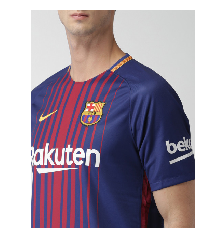

In [4]:
plt.figure()
plt.axis("off")
plt.imshow(image)

In [5]:
image.shape


(640, 480, 3)

In [6]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image)
print (image.shape)

[[224 224 224]
 [224 224 224]
 [225 225 225]
 ...
 [130  97  82]
 [130  94  80]
 [133  93  81]]
(307200, 3)


In [7]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:

#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print(label)

[0.471875, 0.2958203125, 0.2323046875]


In [9]:
!pip install webcolors==1.8.1

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


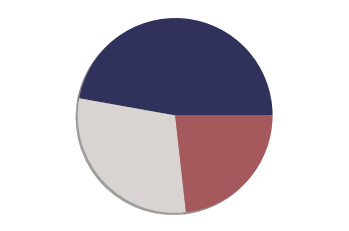

In [10]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]

plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


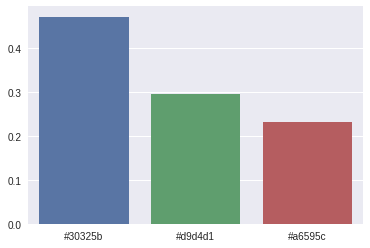

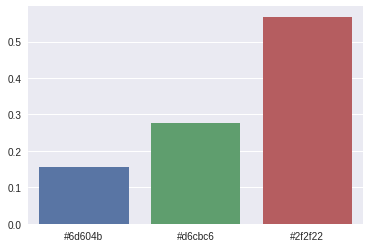

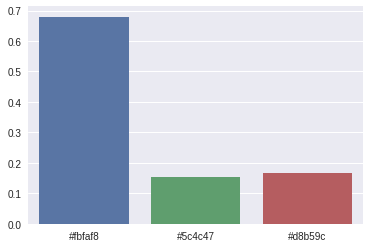

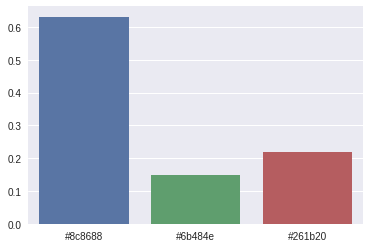

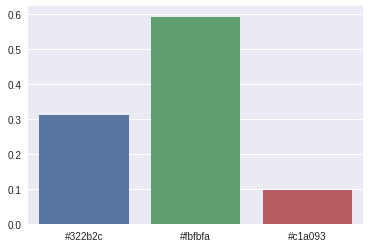

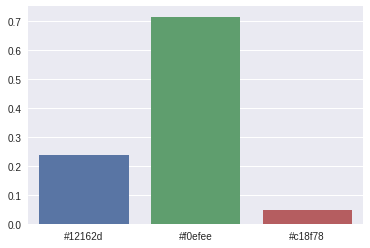

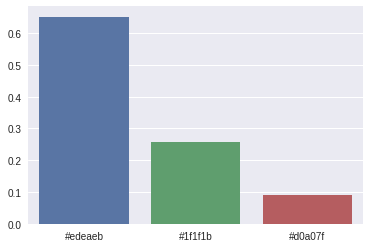

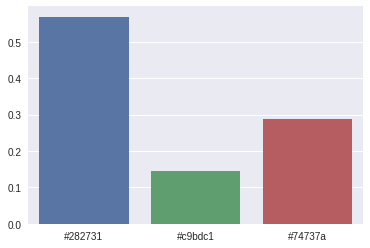

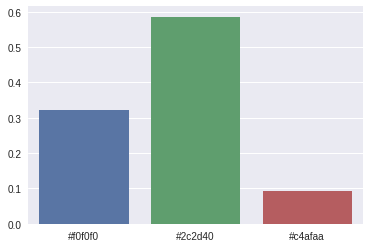

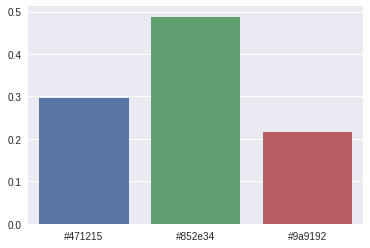

In [11]:
import seaborn as sns
%matplotlib inline
for i in range(1,11):
    image=cv2.imread("image "+str(i)+".jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image=image.reshape((image.shape[0]*image.shape[1],3))
    clf=KMeans(n_clusters=K)
    clf.fit(image)
    label = [0, 0, 0]
    for x in clf.labels_:
        label[x] += 1
    label_sum = image.shape[0]
    label = [float(x) / label_sum for x in label]
    #print(label)
    #print(clf.cluster_centers_)
    centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]
    clr = [webcolors.rgb_to_hex(c) for c in centroids]
    sns.barplot(x=clr,y=label)
    plt.show()